In [5]:
# import statements
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tqdm import tqdm

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
def predict(X, y, w1, w2, verbose=True, bias=True, show_all=False):
    y_pred = [] 
    
    for x in X:
        h = sigmoid(x.dot(w1.T))
        if (bias):
            temp_h = np.append(np.ones(1), h) 
        else:
            temp_h = h
        o = sigmoid(temp_h.dot(w2.T))
        
        y_pred.append(o)

    y = np.argmax(y, axis=1)
    y_pred = np.argmax(y_pred, axis=1)

        accuracy = np.mean(y_pred==y)
    return accuracy

In [8]:
# We use a parameters dictionary becuase there are so many parameters to pass
def backprop(X, Y, params):
    
    # extract parameters
    X_test = params.get('X_test', None) 
    Y_test = params.get('Y_test', None) 
    n_hid = params.get('n_hid', 2)      
    lr = params.get('lr', 0.2)          
    w_init = params.get('w_init', None) 
    w_scale = params.get('w_scale', 1)  
    n_iters = params.get('n_iters', 10) 
    batch = params.get('batch', False)  
    bias = params.get('bias', True)     
    
    if bias:
        ones_col = np.ones((X.shape[0],1))
        X = np.concatenate((ones_col,X), axis=1)
    
    bias_int = 1 if bias else 0
    
    if w_init is not None:
        w1 = np.ones((n_hid,X.shape[1])) * w_init
        w2 = np.ones((Y.shape[1],n_hid+bias_int)) * w_init
    else:
        w1 = np.random.uniform(size=(n_hid,X.shape[1])) / w_scale
        w2 = np.random.uniform(size=(Y.shape[1],n_hid+bias_int)) / w_scale
            
    accuracies = []
    test_accuracies = []
    
    for i in tqdm(range(n_iters)):
        
        history_w1 = [] 
        history_w2 = []
        
        for idx, (x,y) in enumerate(zip(X,Y)):
            h = sigmoid(x.dot(w1.T))
            if bias:
                temp_h = np.append(np.ones(1), h) 
            else:
                temp_h = h
            o = sigmoid(temp_h.dot(w2.T))
            
            do = o*(1-o)*(y-o)
            dh = h * (1-h) * do.dot(w2[:,bias_int:]) # skip bias dim if it exists
            
            dw2 = lr * do.reshape(-1,1) * temp_h
            dw1 = lr * dh.reshape(-1,1) *(x) 

            if batch == True:
                history_w1.append(dw1)
                history_w2.append(dw2)
            
            else:
                w2 += dw2
                w1 += dw1
                
        if batch is True:
            w2 += sum(history_w2)
            w1 += sum(history_w1)

        accuracies.append(predict(X,Y,w1,w2,verbose=False,bias=bias))
        
        if X_test is not None:
            test_accuracies.append(predict(X_test,Y_test,w1,w2,verbose=False,bias=bias))
      
    if X_test is not None:
        return w1, w2, accuracies, test_accuracies
    else:
        return w1, w2, accuracies 

### 1. Running on XOR Truth Table
We test our functions on 2 bit XOR truth table. Note that test data will be same as train data so training accuracy is equivalent to testing accuracy.

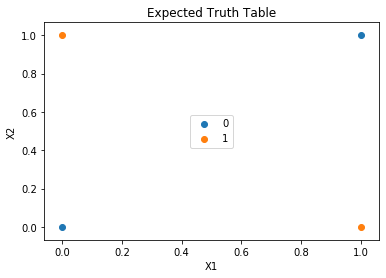

In [9]:
TT = np.asarray([[0,0,0],    
                 [0,1,1], 
                 [1,0,1],
                 [1,1,0]])


X = TT[:,:2]
y = TT[:,-1]
    
plt.title("Expected Truth Table")
plt.xlabel('X1')
plt.ylabel('X2')
    
X_zeros = X[y==0,:]
X_ones  = X[y==1,:]

plt.scatter(X_zeros[:,0], X_zeros[:,1], label = '0')
plt.scatter(X_ones[:,0], X_ones[:,1], label = '1')  
plt.legend(loc='center')

plt.show()

100%|██████████| 10000/10000 [00:02<00:00, 3626.30it/s]


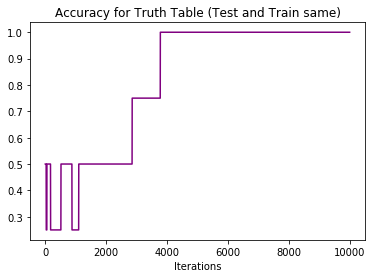

Highest accuracy => 1.0
Final Accuracy => 1.0
[[ 3.05050044  6.39399952 -6.13898707]
 [-3.59446521  6.69147009 -6.85112036]] [[-3.54171113  7.46033187 -7.69206585]
 [ 3.54726735 -7.47193344  7.70405844]]


In [10]:
# Hyperparameters - tune here
params = {
    'n_hid'   : 2,
    'lr'      : 0.2,          
    'w_init'  : None,
    'w_scale' : 1,
    'n_iters' : 10000, 
    'batch'   : False, 
    'bias'    : True
}

X = TT[:,:2] # first two columns
y = TT[:,-1] # last column

y_OH = np.zeros((y.size, y.max()+1))
y_OH[np.arange(y.size),y.reshape(-1)] = 1

w1,w2,accuracies = backprop(X,y_OH,params)

epochs = np.arange(1, len(accuracies)+1)
plt.plot(epochs, accuracies)
plt.title('Accuracy for Truth Table (Test and Train same)')
plt.xlabel('Iterations')
plt.show()